In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [2]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#preprocess the images
train_x = np.expand_dims(train_images/255.0, axis=3)
test_x = np.expand_dims(test_images/255.0, axis=3)

In [5]:
train_y = train_labels
test_y = test_labels

# Miminimze classes

In [6]:
# define function to select only specific category
def select_max_category(data, label, category, max_nr_for_category):
    new_data = []
    new_label = []
    for i in range(len(label)):
        if label[i] == category:
            if len(new_label) <= max_nr_for_category-1:
                new_label.append(label[i])
                new_data.append(data[i])
    #new_data = np.array(new_data)
    #new_label = np.array(new_label)
    return new_data, new_label

In [7]:
#create a set with only ones in it for experimenting
# with ones, as we want to reduce the zeros
all_zero_x = test_x[np.where(test_y==1)[0]]
all_zero_y = test_y[np.where(test_y==1)[0]]

In [8]:
# select some pictures of class 1 and define how many
# in the original dataset 7000 images per class are available
rate = 0.05
zero_x, zero_y = select_max_category(train_x, train_y, 0, 6000*rate)
one_x, one_y = select_max_category(train_x, train_y, 1, 6000*rate)
two_x, two_y = select_max_category(train_x, train_y, 2, 6000*rate)
three_x, three_y = select_max_category(train_x, train_y, 3, 6000*rate)
four_x, four_y = select_max_category(train_x, train_y, 4, 6000*rate)
five_x, five_y = select_max_category(train_x, train_y, 5, 6000*rate)
six_x, six_y = select_max_category(train_x, train_y, 6, 6000*rate)
seven_x, seven_y = select_max_category(train_x, train_y, 7, 6000*rate)
eight_x, eight_y = select_max_category(train_x, train_y, 8, 6000*rate)
nine_x, nine_y = select_max_category(train_x, train_y, 9, 6000*rate)

In [9]:
one_x = np.array(one_x)
one_x.shape

(300, 28, 28, 1)

In [10]:
one_y = np.array(one_y)
one_y.shape

(300,)

In [11]:
train_x = np.append(two_x, one_x, axis=0)
train_x = np.append(train_x, three_x, axis = 0)
train_x = np.append(train_x, four_x, axis = 0)
train_x = np.append(train_x, five_x, axis = 0)
train_x = np.append(train_x, six_x, axis = 0)
train_x = np.append(train_x, seven_x, axis = 0)
train_x = np.append(train_x, eight_x, axis = 0)
train_x = np.append(train_x, nine_x, axis = 0)
train_x = np.append(train_x, zero_x, axis = 0)

                   
train_y = np.append(two_y, one_y, axis=0)
train_y = np.append(train_y, three_y, axis=0)
train_y = np.append(train_y, four_y, axis=0)
train_y = np.append(train_y, five_y, axis=0)
train_y = np.append(train_y, six_y, axis=0)
train_y = np.append(train_y, seven_y, axis=0)
train_y = np.append(train_y, eight_y, axis=0)
train_y = np.append(train_y, nine_y, axis=0)
train_y = np.append(train_y, zero_y, axis=0)
#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [12]:
print(train_x.shape, train_y.shape)

(3000, 28, 28, 1) (3000,)


In [13]:
#shuffle the data
n = train_x.shape[0]
## numpy has a shuffle method
permutation = np.arange(n) #n = number of pictures/length of data
np.random.shuffle(permutation)
    
train_x = [train_x[i] for i in permutation]
train_y = [train_y[i] for i in permutation]
#labels_ohe_shuffled = [labels_ohe[i] for i in permutation]

train_x = np.array(train_x)
train_y = np.array(train_y)

#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding
train_y = np.array(pd.get_dummies(train_y))

In [14]:
print(train_x.shape)
print(train_y.shape)

(3000, 28, 28, 1)
(3000, 10)


# Construct a baseline CNN

In [57]:
model = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(10, activation='softmax')
])

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [59]:
history = model.fit(train_x, train_y, epochs = 10)

Epoch 1/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 1.1296 - acc: 0.5820
Epoch 2/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.6516 - acc: 0.7693
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.5561 - acc: 0.8053 0s - loss: 0.5645 - a
Epoch 4/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.5083 - acc: 0.8177
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.4715 - acc: 0.8347
Epoch 6/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.4455 - acc: 0.8463
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.4115 - acc: 0.8443
Epoch 8/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.3956 - acc: 0.8557
Epoch 9/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.3721 - acc: 0.8677
Epoch 10/10
3000/3000 [==============================] - 3s 889us/sample - loss: 0.3625

In [60]:
model.save('C_001_model_b.h5') #save the model for the scrumbled data

In [15]:
model = tf.keras.models.load_model('C_001_model_b.h5')

W1206 13:23:18.780790 20092 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 13:23:18.780790 20092 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 13:23:18.780790 20092 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_op

# Check the baseline model for a random picture

In [16]:
picture = 100
picture_end = picture + 1

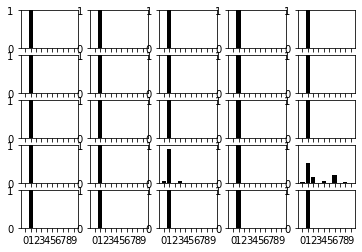

In [21]:
for i in range(2,27,1):
    j = 1+i
    k = i-1
    prediction = model.predict([one_x[i:j], 1])[0]
    x = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(5,5,k)
    plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
    plt.xticks(x)
    plt.ylim(0,1.0)
    #plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.title('probabilities predicted')

Text(0.5, 1.0, 'image')

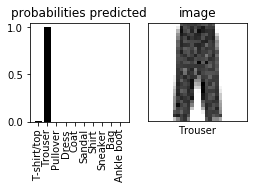

In [22]:
prediction = model.predict([one_x[picture:picture_end], 1])[0]
x = [0,1,2,3,4,5,6,7,8,9]
plt.subplot(2,3,1)
plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('probabilities predicted')

plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[one_y[picture]])
plt.title('image')

# Create a model with MC Dropout

In [23]:
model_mc2 = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.3)),
    keras.layers.Dense(10, activation='softmax')
])
model_mc2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mc2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1

In [24]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [77]:
history_mc2 = model_mc2.fit(train_x, train_y, epochs = 10)

Epoch 1/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 1.3278 - acc: 0.5113
Epoch 2/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.7961 - acc: 0.7057
Epoch 3/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.6661 - acc: 0.7547
Epoch 4/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.6073 - acc: 0.7753
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.5603 - acc: 0.7943
Epoch 6/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.5350 - acc: 0.7987
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.5224 - acc: 0.8090
Epoch 8/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.4951 - acc: 0.8200
Epoch 9/10
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.4754 - acc: 0.8197
Epoch 10/10
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.4824 - acc: 0.8217


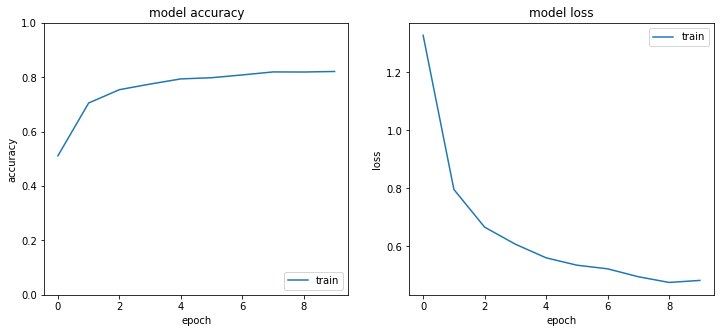

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc2.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc2.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [79]:
model_mc2.save('C_001_model_mc2.h5')

In [25]:
model_mc2 = tf.keras.models.load_model('C_001_model_mc2.h5')

## predictions for an image

In [26]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [27]:
picture = 100
picture_end = picture+1
model_mc2_pred([one_x[picture:picture_end], 1])[0]

array([[3.1289667e-02, 9.4016117e-01, 1.7600791e-03, 2.3959284e-03,
        1.1661961e-02, 3.1021646e-05, 1.1977415e-02, 2.9450041e-04,
        3.9619987e-04, 3.1952521e-05]], dtype=float32)

(100, 10)


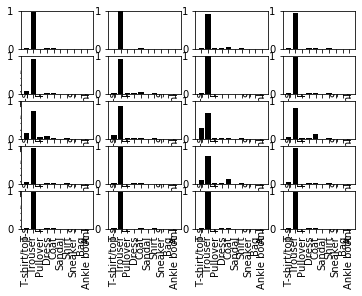

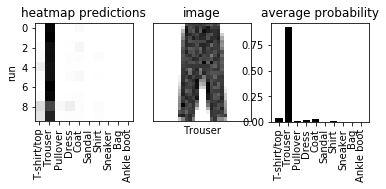

[3.6024164e-02 9.2200643e-01 2.1600991e-03 1.1574823e-02 2.0807836e-02
 1.0800326e-05 6.9147563e-03 1.0302920e-04 3.8240038e-04 1.5849129e-05]


In [24]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_mc2_pred([one_x[picture:picture_end], 1])[0]
for i in range(100,199,1):
    pred = model_mc2_pred([one_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[one_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

# Evaluate and quantify the BNN

In [29]:
#import the helper functions for evaluation
from helper_functions import b_predict_mc as bpmc
from helper_functions import m_predict_mc as apmc

## evaluate baseline CNN

In [27]:
# evaluate the baseline CNN on the test dataset
test_y_ohe = np.array(pd.get_dummies(test_y))
model.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 2s 200us/sample - loss: 0.4405 - acc: 0.8411


[0.44045777835845945, 0.8411]

## evaluate the BNN with the standard prediction method

In [28]:
test_y_ohe = np.array(pd.get_dummies(test_y))
model_mc2.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 2s 219us/sample - loss: 0.5331 - acc: 0.8258


[0.5330541628360749, 0.8258]

## Bernoulli Predict

In [20]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

In [30]:
# test without taking uncertainty into consideration
# for 5, 10, 25, 50 and 100 predictions per image
pred = bpmc.b_predict_mc(test_x, model_mc2_pred, 10, 5)

In [35]:
import pandas as pd
p = pd.DataFrame(pred)
#p['soll'] = test_y
#p.to_csv("C_001_test_set_with_predictions_5.csv", ";")

In [36]:
#just the predictions:
(p[0] == test_y).sum()/test_x.shape[0]

0.8231

In [37]:
#for different uncertainty levels
for i in list_of_dev:
    p['unc_est'] = np.where(p[3] >= i, 1, p[0])
    w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.5667
0.2 :  0.5667
0.3 :  0.6597
0.4 :  0.705
0.5 :  0.795


In [38]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                p['unc_est'] = np.where(((p[3] >= i) & (p[3]<=j)), 1, p[0])
                w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
                print(i, "-", j, ": " , w)

0.1 - 0.2 :  0.7621
0.1 - 0.3 :  0.7301
0.1 - 0.4 :  0.6651
0.1 - 0.5 :  0.5667
0.2 - 0.3 :  0.7301
0.2 - 0.4 :  0.6651
0.2 - 0.5 :  0.5667
0.3 - 0.4 :  0.7581
0.3 - 0.5 :  0.6597
0.4 - 0.5 :  0.705


### graphic

In [1]:
x = [5, 10, 25]
y = [0.8173, 0.8219, 0.8231]
y50 = [0.8173, 0.805, 0.705]
y40 = [0.6682, 0.6898, 0.705]
y30 = [0.6682, 0.6236, 0.6597]
y20 = [0.6682, 0.6236, 0.5667]
y10 = [0.6682, 0.6236, 0.5667]

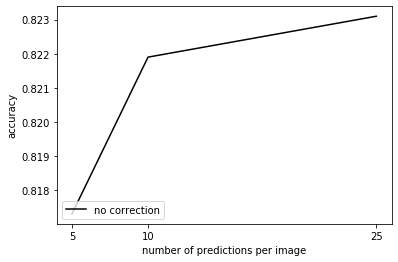

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
#plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
#plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
#plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
#plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
#plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()

# Averge predict

In [45]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

In [ ]:
pred = apmc.avg_predict_mc(test_x, model_mc2_pred, 10, 5)

In [54]:
df = pd.DataFrame(pred)
#df['soll'] = test_y
#df.to_csv("C_001_test_with_max_pred_5.csv", ";")

c:\users\annar\project_folder\venv\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


In [55]:
#just the predictions:
(df[0] == test_y).sum()/test_x.shape[0]

0.8272

In [56]:
#for different uncertainty levels
for i in list_of_dev:
    df['unc_est'] = np.where(df[3] >= i, 1, df[0])
    w = (df['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.4889
0.2 :  0.7733
0.3 :  0.8267
0.4 :  0.8272
0.5 :  0.8272


In [57]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                df['unc_est'] = np.where(((df[3] >= i) & (df[3]<=j)), 1, df[0])
                w = (df['unc_est'] == test_y).sum()/test_x.shape[0]                
                print(i, "-", j, ": " , w)
            

0.1 - 0.2 :  0.5428
0.1 - 0.3 :  0.4894
0.1 - 0.4 :  0.4889
0.1 - 0.5 :  0.4889
0.2 - 0.3 :  0.7738
0.2 - 0.4 :  0.7733
0.2 - 0.5 :  0.7733
0.3 - 0.4 :  0.8267
0.3 - 0.5 :  0.8267
0.4 - 0.5 :  0.8272


### graphic

In [58]:
x = [5, 10, 25]
y = [0.822, 0.8239, 0.8272]
y50 = [0.822, 0.8239, 0.8272]
y40 = [0.8219, 0.8239, 0.8272]
y30 = [0.8131, 0.8222, 0.8267]
y20 = [0.7436, 0.7574, 0.7733]
y10 = [0.5426, 0.513, 0.4889]

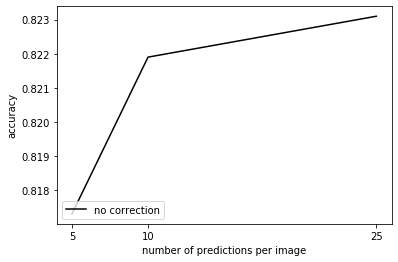

In [5]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
#plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
#plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
#plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
#plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
#plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()

# Compare bernoulli predict with average predict 

In [2]:
x = [5, 10, 25]
y_bern = [0.8173, 0.8219, 0.8231]
y_avg = [0.822, 0.8239, 0.8272]
y_baseline = [0.8411, 0.8411, 0.8411]

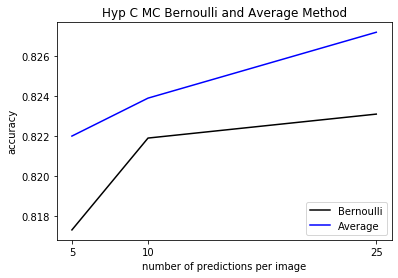

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y_bern, label='Bernoulli', color='black')
plt.plot(x, y_avg, label='Average', color='blue')
#plt.plot(x, y_baseline, label='Baseline', color='red')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower right')
plt.title("Hyp C MC Bernoulli and Average Method")
plt.show()